In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Begin from CSV file
http://explore.data.parliament.uk/?endpoint=commonsdivisions#download-list

In [2]:
df = pd.read_csv("downloaded_01May2019.csv")

In [3]:
#data cleaning of duplicate motions
df['code']= df['_about'].str.extract('(\d+)', expand=True)
df['code'].astype(int)
df['motion2'] = df['motion']+' '+df['code']

In [4]:
# Members and parties
metadata = df.drop_duplicates(subset='memberPrinted._value', keep='first')
metadata = metadata[['memberParty','memberPrinted._value']]
metadata.reset_index(drop=True, inplace=True)
#metadata

In [5]:
print(df.shape)
df.tail(2)

(217389, 12)


,Unnamed: 0,_about,date,member,memberParty,memberPrinted._value,motion,type,vote,vote1,code,motion2
217387,630,http://data.parliament.uk/resources/746031/vot...,2017-06-28,[{'_about': 'http://data.parliament.uk/members...,Labour,Vernon Coaker,"Queen's Speech: Health, Social Care and Securi...",http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,746031,"Queen's Speech: Health, Social Care and Securi..."
217388,631,http://data.parliament.uk/resources/746031/vot...,2017-06-28,[{'_about': 'http://data.parliament.uk/members...,Labour,Mrs Emma Lewell-Buck,"Queen's Speech: Health, Social Care and Securi...",http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,746031,"Queen's Speech: Health, Social Care and Securi..."


## Data cleaning for duplicate MPs

In [6]:
df = df.replace({'memberPrinted._value': \
                             {'Mrs Louise Ellman':'Dame Louise Ellman', \
                             'David Evennett':'Sir David Evennett',\
                             'Preet Gill':'Preet Kaur Gill',\
                             'Mrs Cheryl Gillan':'Dame Cheryl Gillan',\
                             'Mr John Hayes':'Sir John Hayes',\
                             'Mr Mark Hendrick':'Sir Mark Hendrick',\
                             'Damian Hinds':'Mr Damian Hinds',\
                             'Mr Nick  Hurd':'Mr Nick Hurd',\
                             'Mr Bernard Jenkin':'Sir Bernard Jenkin',\
                             'Ged Killen':'Gerard Killen',\
                             'Karen Lee':'Ms Karen Lee',\
                             'Caroline  Nokes':'Caroline Nokes',\
                             'Mr Gary Streeter':'Sir Gary Streeter',\
                             'Mr Paul J Sweeney':'Mr Paul Sweeney',\
                             'Mr Robert Syms':'Sir Robert Syms',\
                             'Anne-Marie Trevelyan':'Mrs Anne-Marie Trevelyan',\
                             'Mr Ben  Wallace':'Mr Ben Wallace',\
                             'Mr Alan Campbell':'Sir Alan Campbell',\
                             'Geoffrey Clifton-Brown':'Sir Geoffrey Clifton-Brown',\
                             'Mr Christopher Chope':'Sir Christopher Chope',\
                             'Mike Penning':'Sir Mike Penning',\
                             'Sir Mike  Penning':'Sir Mike Penning',\
                             'Mr Graham Brady':'Sir Graham Brady',\
                             'Sammy  Wilson':'Sammy Wilson',\
                             'Suella Fernandes':'Suella Braverman',\
                             'Julia Dockerill':'Julia Lopez',\
                             'Paul Flynn':'Ruth Jones',\
                             'Heidi Alexander':'Janet Daby'}\
                            })
                             
#married name: 'Suella Fernandes':'Suella Braverman' 
#married name: 'Julia Dockerill':'Julia Lopez'
#death: 'Paul Flynn':'Ruth Jones' #PaulFlynn died 17Feb2019; succeeded by Ruth Jones
#resignation: 'Heidi Alexander':'Janet Daby' #resigned in May 2018 to join the mayoral team.

## Brexit labeling

In [7]:
Brexit_codelist = pd.read_excel("HoC_motions_labels.xlsx", sheet_name="Brexit_codelist", encoding="UTF-8")
Brexit_codelist = Brexit_codelist["Brexit related"].tolist()
Brexit_codelist = [str(i) for i in Brexit_codelist]

In [8]:
Brexit_df = df[df['code'].isin(Brexit_codelist)]
Non_Brexit_df = df[df['code'].isin(Brexit_codelist) == False]

In [9]:
overall = pd.pivot_table(df, values='vote1', index=['memberPrinted._value'], columns=['motion2'], aggfunc=np.sum).fillna(0)
print(overall.shape)

Brexit_table = pd.pivot_table(Brexit_df, values='vote1', index=['memberPrinted._value'], columns=['motion2'], aggfunc=np.sum).fillna(0)
print(Brexit_table.shape)

Non_Brexit_table = pd.pivot_table(Non_Brexit_df, values='vote1', index=['memberPrinted._value'], columns=['motion2'], aggfunc=np.sum).fillna(0)
print(Non_Brexit_table.shape)

MPs = list(overall.index.values) 

(639, 414)
(639, 192)
(639, 222)


In [10]:
overall.head()

motion2,EU (Withdrawal) Act Section 13 Amdt (o) - Blackford 1050639,Agriculture Bill: Second Reading Jeremy Corbyn's Amdt 984695,Air Travel Organisers' Bill: Committee of the whole House Amdt 3 750425,Air Travel Organisers' Licensing Bill: Committee of the whole House Amdt 2 750424,Air Travel Organisers' Licensing Bill: Committee of the whole House New Clause 1 750435,Amendment (a) to Lords Amendment 5 to the EU (Withdrawal) (No. 5) Bill 1110165,Amendment (a) to the Business of the House motion 1109325,Amendment (a) to the motion on the UK's withdrawal from the European Union 1087777,Amendment (a): Privilege (Withdrawal Agreement legal advice) 1019666,Amendment (f) to the motion on the UK's withdrawal from the European Union 1087775,...,draft Immigration (Health Charge) (Amendment) Order 2018 1011382,draft Intellectural Property (Copyright and Related Rights) (Amendment) (EU Exit) Regulations 2018 1060521,draft Long-term Investment Funds (Amendment) (EU Exit) Regulations 2019 1055729,draft Markets in Financial Instruments (Amendment) (EU Exit) Regulations 2018 1028418,draft Official Listing of Securities Prospectus and Transparency (Amendment etc.) (EU Exit) Regulations 2019 1078368,draft Organic Production (Control of Imports) (Amendment) (EU Exit) Regulations 2019 1092056,draft Organic Production and Control (Amendment) (EU Exit) Regulations 2019 1092053,draft Product Safety and Metrology etc. (Amendment etc.) (EU Exit) Regulations 2019 1092054,draft REACH etc. (Amendment etc.) (EU Exit) Regulations 2019 1076721,draft Waste (Miscellaneous Amendments) (EU Exit) Regulations 2019 1087761
memberPrinted._value,,,,,,,,,,,,,,,,,,,,,
Adam Afriyie,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Adam Holloway,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
Afzal Khan,0.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,...,0.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0
Alan Brown,1.0,0.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,0.0
Alan Mak,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Dot Product - adjacency matrices
## No normalization

In [11]:
def no_normalization(table):
    a = np.array(table)
    dp = pd.DataFrame(np.dot(a,a.transpose()), columns=MPs, index=MPs).round(3)
    #dp.to_csv("adjmat-nonormalization.csv")
    return dp.head()

#the diagonal should be the max.
#i've checked this on excel, looks correct.

In [12]:
no_normalization(overall)

,Adam Afriyie,Adam Holloway,Afzal Khan,Alan Brown,Alan Mak,Albert Owen,Alberto Costa,Alec Shelbrooke,Alex Burghart,Alex Chalk,...,Victoria Prentis,Wayne David,Wendy Morton,Wera Hobhouse,Wes Streeting,Will Quince,Yasmin Qureshi,Yvette Cooper,Yvonne Fovargue,Zac Goldsmith
Adam Afriyie,384.0,327.0,-293.0,-275.0,346.0,-283.0,316.0,305.0,348.0,333.0,...,328.0,-294.0,306.0,-264.0,-296.0,359.0,-259.0,-278.0,-255.0,359.0
Adam Holloway,327.0,339.0,-257.0,-245.0,302.0,-248.0,275.0,265.0,306.0,295.0,...,290.0,-260.0,261.0,-242.0,-262.0,315.0,-234.0,-247.0,-220.0,320.0
Afzal Khan,-293.0,-257.0,346.0,253.0,-275.0,308.0,-251.0,-246.0,-280.0,-270.0,...,-276.0,334.0,-235.0,274.0,329.0,-279.0,291.0,313.0,289.0,-279.0
Alan Brown,-275.0,-245.0,253.0,302.0,-267.0,248.0,-245.0,-246.0,-269.0,-259.0,...,-267.0,253.0,-231.0,248.0,263.0,-270.0,237.0,246.0,221.0,-268.0
Alan Mak,346.0,302.0,-275.0,-267.0,380.0,-271.0,342.0,319.0,369.0,361.0,...,349.0,-277.0,321.0,-250.0,-280.0,363.0,-245.0,-263.0,-245.0,343.0


## Jaccard Similarity
### Arithmetic mean

In [13]:
from sklearn.metrics import pairwise_distances

In [14]:
def jaccard_similarity(table):
    am = pd.DataFrame(1-pairwise_distances(table, metric ="jaccard"), columns=MPs, index=MPs).round(3)
    return am.head()

In [15]:
jaccard_similarity(overall)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


,Adam Afriyie,Adam Holloway,Afzal Khan,Alan Brown,Alan Mak,Albert Owen,Alberto Costa,Alec Shelbrooke,Alex Burghart,Alex Chalk,...,Victoria Prentis,Wayne David,Wendy Morton,Wera Hobhouse,Wes Streeting,Will Quince,Yasmin Qureshi,Yvette Cooper,Yvonne Fovargue,Zac Goldsmith
Adam Afriyie,1.000,0.854,0.802,0.728,0.939,0.782,0.909,0.829,0.949,0.937,...,0.898,0.799,0.808,0.802,0.816,0.942,0.725,0.758,0.733,0.931
Adam Holloway,0.854,1.000,0.730,0.687,0.820,0.704,0.805,0.728,0.840,0.838,...,0.799,0.726,0.704,0.756,0.743,0.835,0.688,0.705,0.661,0.864
Afzal Khan,0.802,0.730,1.000,0.666,0.793,0.839,0.782,0.728,0.807,0.819,...,0.794,0.946,0.700,0.778,0.917,0.802,0.832,0.884,0.831,0.780
Alan Brown,0.728,0.687,0.666,1.000,0.735,0.665,0.706,0.702,0.746,0.740,...,0.732,0.674,0.649,0.674,0.701,0.725,0.651,0.653,0.616,0.718
Alan Mak,0.939,0.820,0.793,0.735,1.000,0.781,0.918,0.828,0.944,0.947,...,0.912,0.785,0.812,0.792,0.797,0.923,0.698,0.752,0.714,0.902


## Cosine Similarity
### Geometric mean

In [11]:
def cosine_similarity(table):
    cs = pd.DataFrame(1-pairwise_distances(table, metric ="cosine"), columns=MPs, index=MPs).round(3)
    iu1 = np.triu_indices(639) 
    triangle_upper = cs.values[iu1]
    plt.hist(triangle_upper, range=[-1, 1], bins="auto")
    plt.show()
    #cs.to_csv("adjmat.csv")
    return cs.head()

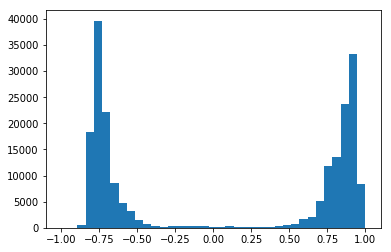

,Adam Afriyie,Adam Holloway,Afzal Khan,Alan Brown,Alan Mak,Albert Owen,Alberto Costa,Alec Shelbrooke,Alex Burghart,Alex Chalk,...,Victoria Prentis,Wayne David,Wendy Morton,Wera Hobhouse,Wes Streeting,Will Quince,Yasmin Qureshi,Yvette Cooper,Yvonne Fovargue,Zac Goldsmith
Adam Afriyie,1.000,0.906,-0.804,-0.808,0.906,-0.796,0.836,0.853,0.906,0.864,...,0.862,-0.812,0.846,-0.726,-0.812,0.924,-0.764,-0.792,-0.746,0.949
Adam Holloway,0.906,1.000,-0.750,-0.766,0.841,-0.743,0.774,0.789,0.848,0.814,...,0.811,-0.765,0.768,-0.709,-0.765,0.863,-0.735,-0.749,-0.685,0.900
Afzal Khan,-0.804,-0.750,1.000,0.783,-0.758,0.913,-0.700,-0.725,-0.768,-0.738,...,-0.764,0.972,-0.684,0.794,0.951,-0.757,0.905,0.939,0.891,-0.777
Alan Brown,-0.808,-0.766,0.783,1.000,-0.788,0.787,-0.731,-0.776,-0.790,-0.758,...,-0.791,0.788,-0.720,0.769,0.814,-0.784,0.789,0.790,0.729,-0.799
Alan Mak,0.906,0.841,-0.758,-0.788,1.000,-0.766,0.910,0.897,0.966,0.941,...,0.922,-0.770,0.892,-0.691,-0.772,0.939,-0.727,-0.753,-0.721,0.911


In [14]:
cosine_similarity(overall)

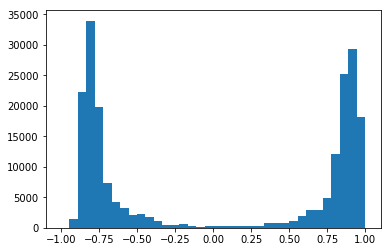

,Adam Afriyie,Adam Holloway,Afzal Khan,Alan Brown,Alan Mak,Albert Owen,Alberto Costa,Alec Shelbrooke,Alex Burghart,Alex Chalk,...,Victoria Prentis,Wayne David,Wendy Morton,Wera Hobhouse,Wes Streeting,Will Quince,Yasmin Qureshi,Yvette Cooper,Yvonne Fovargue,Zac Goldsmith
Adam Afriyie,1.000,0.915,-0.864,-0.870,0.850,-0.888,0.715,0.806,0.854,0.773,...,0.811,-0.861,0.825,-0.798,-0.871,0.913,-0.848,-0.843,-0.768,0.947
Adam Holloway,0.915,1.000,-0.812,-0.831,0.779,-0.835,0.631,0.736,0.786,0.710,...,0.737,-0.809,0.735,-0.767,-0.816,0.851,-0.810,-0.799,-0.711,0.901
Afzal Khan,-0.864,-0.812,1.000,0.886,-0.808,0.935,-0.679,-0.791,-0.814,-0.750,...,-0.772,0.985,-0.747,0.838,0.964,-0.822,0.966,0.966,0.900,-0.855
Alan Brown,-0.870,-0.831,0.886,1.000,-0.820,0.906,-0.716,-0.811,-0.821,-0.757,...,-0.813,0.882,-0.743,0.911,0.911,-0.829,0.880,0.874,0.795,-0.873
Alan Mak,0.850,0.779,-0.808,-0.820,1.000,-0.845,0.837,0.888,0.965,0.905,...,0.906,-0.805,0.912,-0.741,-0.816,0.928,-0.789,-0.790,-0.749,0.896


In [15]:
cosine_similarity(Brexit_table)

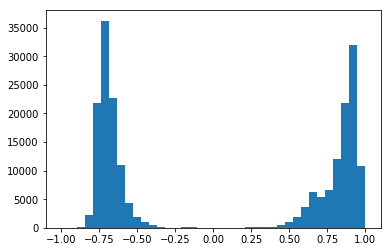

,Adam Afriyie,Adam Holloway,Afzal Khan,Alan Brown,Alan Mak,Albert Owen,Alberto Costa,Alec Shelbrooke,Alex Burghart,Alex Chalk,...,Victoria Prentis,Wayne David,Wendy Morton,Wera Hobhouse,Wes Streeting,Will Quince,Yasmin Qureshi,Yvette Cooper,Yvonne Fovargue,Zac Goldsmith
Adam Afriyie,1.000,0.898,-0.747,-0.742,0.959,-0.701,0.949,0.898,0.957,0.950,...,0.911,-0.766,0.865,-0.657,-0.754,0.935,-0.678,-0.742,-0.724,0.950
Adam Holloway,0.898,1.000,-0.693,-0.698,0.900,-0.649,0.905,0.838,0.907,0.912,...,0.880,-0.724,0.799,-0.653,-0.716,0.875,-0.659,-0.701,-0.660,0.899
Afzal Khan,-0.747,-0.693,1.000,0.678,-0.713,0.893,-0.718,-0.663,-0.726,-0.727,...,-0.757,0.961,-0.625,0.753,0.938,-0.696,0.845,0.914,0.883,-0.703
Alan Brown,-0.742,-0.698,0.678,1.000,-0.758,0.648,-0.752,-0.742,-0.760,-0.763,...,-0.773,0.692,-0.698,0.618,0.709,-0.739,0.684,0.701,0.658,-0.720
Alan Mak,0.959,0.900,-0.713,-0.758,1.000,-0.688,0.975,0.905,0.967,0.975,...,0.937,-0.737,0.873,-0.645,-0.731,0.950,-0.666,-0.718,-0.694,0.925


In [19]:
cosine_similarity(Non_Brexit_table)

# Party Similarity

In [16]:
party_df = pd.read_csv("MPs_639.csv")
party_df = party_df.replace({'Id':{'Dr Th√©r√®se Coffey':'Dr Thérèse Coffey'}})
party_df.set_index("Id", inplace=True)

#MemberParty = original
#MemberParty9 = 9 parties; labour(coop) to labour; relabeled from 2 to 11 Change UK party members.
#MemberParty8 = 8 parties; Change UK labeled to original party.  Independents left as is.
#MemberParty8a = 8 parties; Change UK and Independents labeled to original party.
#MemberParty3 = 3 parties: Left / Right / Ind; Change Party labeled L/R accdg to original party.
#MemberParty2 = 2 parties: Left / Right.  Ind & Change labeled L/R accdg to original party.

def party_similarity(col):
    global party_sim
    party= pd.get_dummies(col)
    MPs1 = list(party.index.values)
    party_sim = pd.DataFrame(np.dot(party,party.transpose()), columns=MPs1, index=MPs1)
    party_sim = party_sim.astype(int).replace(0,-1)
    return

In [17]:
party= pd.get_dummies(party_df['MemberParty2'])
MPs1 = list(party.index.values)
party_sim = pd.DataFrame(np.dot(party,party.transpose()), columns=MPs1, index=MPs1)
party_sim = party_sim.astype(int).replace(0,-1)
party_sim.sort_index(axis=1, inplace=True)
party_sim.sort_index(axis=0)


,Adam Afriyie,Adam Holloway,Afzal Khan,Alan Brown,Alan Mak,Albert Owen,Alberto Costa,Alec Shelbrooke,Alex Burghart,Alex Chalk,...,Victoria Prentis,Wayne David,Wendy Morton,Wera Hobhouse,Wes Streeting,Will Quince,Yasmin Qureshi,Yvette Cooper,Yvonne Fovargue,Zac Goldsmith
Adam Afriyie,1,1,-1,-1,1,-1,1,1,1,1,...,1,-1,1,-1,-1,1,-1,-1,-1,1
Adam Holloway,1,1,-1,-1,1,-1,1,1,1,1,...,1,-1,1,-1,-1,1,-1,-1,-1,1
Afzal Khan,-1,-1,1,1,-1,1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,1,1,1,-1
Alan Brown,-1,-1,1,1,-1,1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,1,1,1,-1
Alan Mak,1,1,-1,-1,1,-1,1,1,1,1,...,1,-1,1,-1,-1,1,-1,-1,-1,1
Albert Owen,-1,-1,1,1,-1,1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,1,1,1,-1
Alberto Costa,1,1,-1,-1,1,-1,1,1,1,1,...,1,-1,1,-1,-1,1,-1,-1,-1,1
Alec Shelbrooke,1,1,-1,-1,1,-1,1,1,1,1,...,1,-1,1,-1,-1,1,-1,-1,-1,1
Alex Burghart,1,1,-1,-1,1,-1,1,1,1,1,...,1,-1,1,-1,-1,1,-1,-1,-1,1
Alex Chalk,1,1,-1,-1,1,-1,1,1,1,1,...,1,-1,1,-1,-1,1,-1,-1,-1,1


# Party difference

In [18]:
partylist = ['9','8','8a','3','2']

def party_difference(table):    
    for item in partylist:
        party_similarity(party_df['MemberParty'+item])
        ps = pd.DataFrame(1-pairwise_distances(table, metric ="cosine"), columns=MPs, index=MPs).round(3) - party_sim
        iu1 = np.triu_indices(639) 
        triangle_upper = ps.values[iu1]
        plt.figure(figsize=(8, 20))
        plt.subplot(5,1,partylist.index(item)+1)
        plt.hist(triangle_upper, range=[-2, 2], bins="auto")
        plt.title(item+' parties')
        #ps.round(3).to_csv("ps.csv")
    return

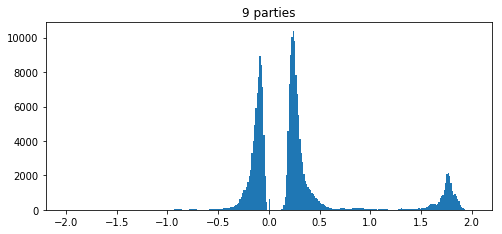

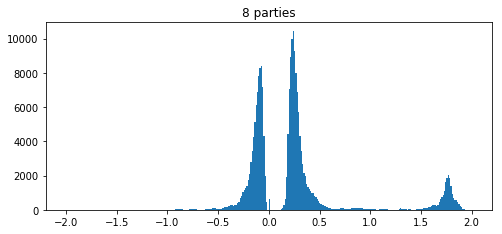

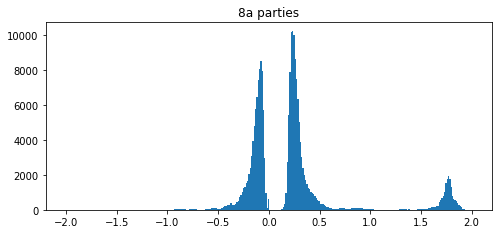

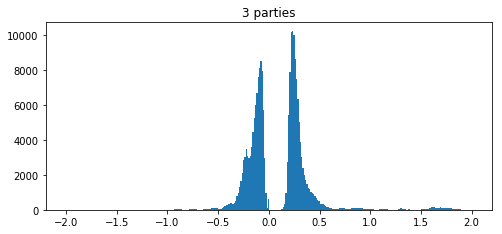

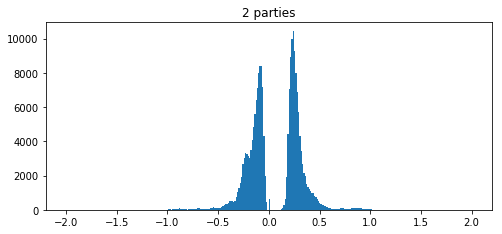

In [19]:
party_difference(overall)

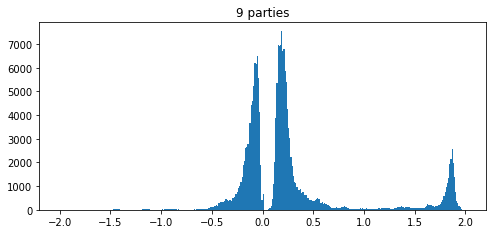

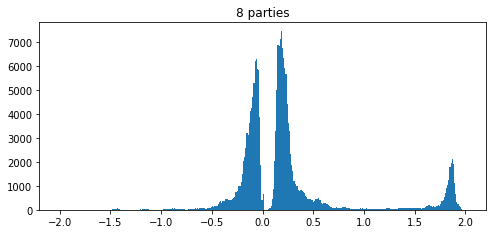

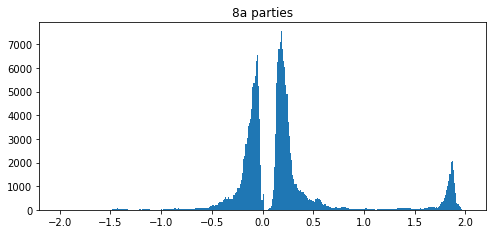

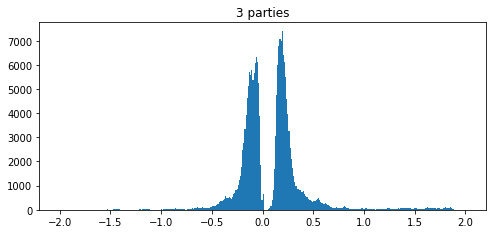

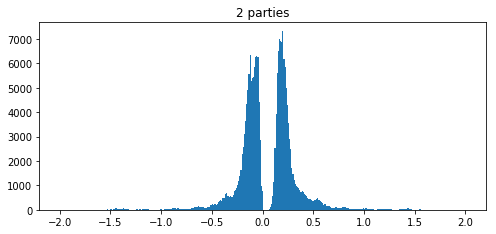

In [19]:
party_difference(Brexit_table)

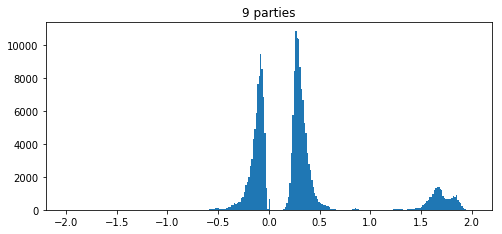

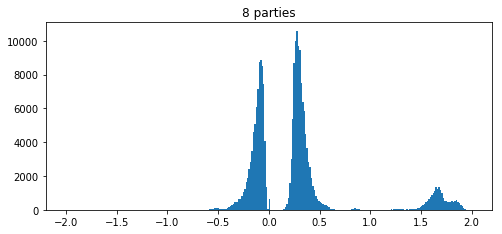

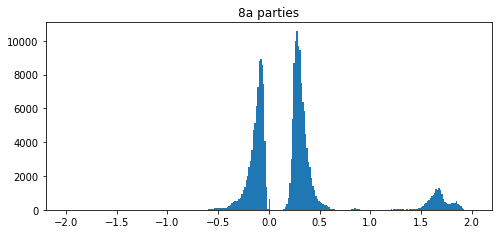

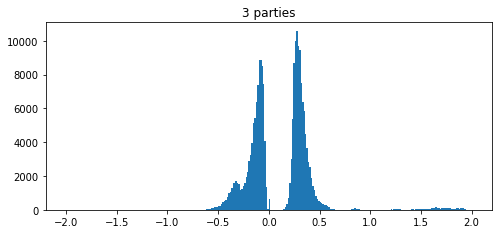

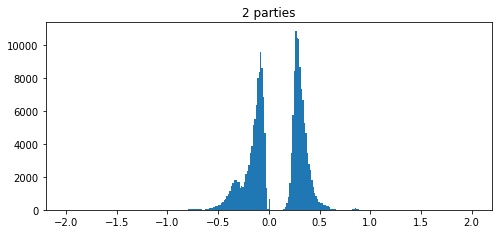

In [24]:
party_difference(Non_Brexit_table)

# Combined

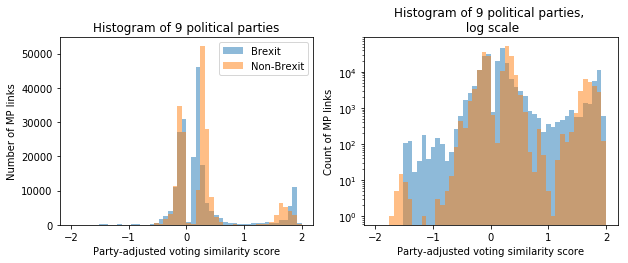

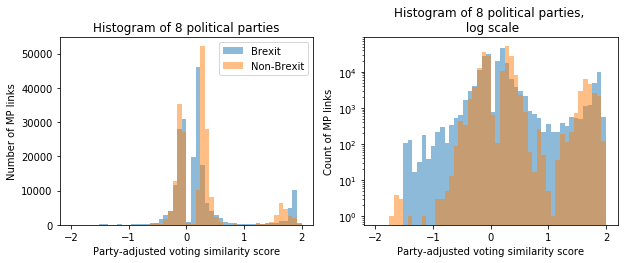

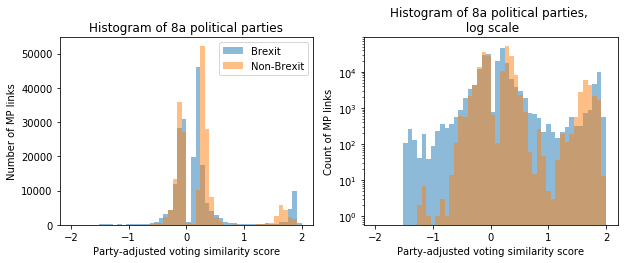

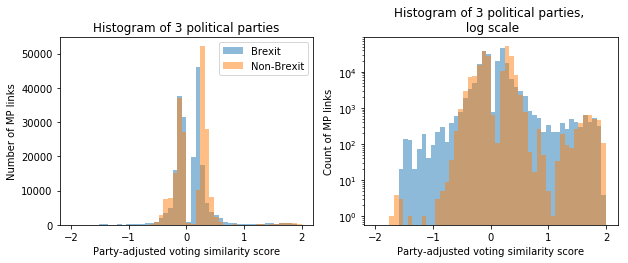

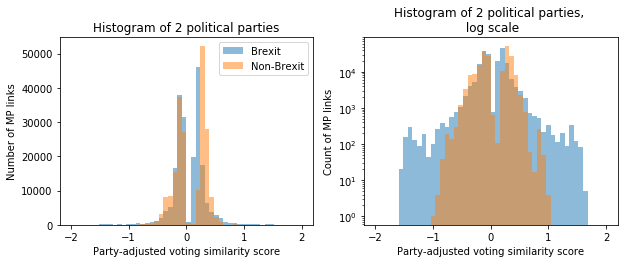

In [27]:
a = 0
partylist = ['9','8','8a','3','2']

for item in partylist:
    party_similarity(party_df['MemberParty'+item])
    iu1 = np.triu_indices(639) 

    ps_b = pd.DataFrame(1-pairwise_distances(Brexit_table, metric ="cosine"), columns=MPs, index=MPs).round(3) - party_sim
    b_triangle_upper = ps_b.values[iu1]

    ps_nb = pd.DataFrame(1-pairwise_distances(Non_Brexit_table, metric ="cosine"), columns=MPs, index=MPs).round(3) - party_sim
    nb_triangle_upper = ps_nb.values[iu1]

    plt.figure(figsize=(10, 20))
    plt.subplot(5,2,a+1)
    plt.hist(b_triangle_upper, range=[-2, 2], bins=50, alpha=0.5, label='Brexit')
    plt.hist(nb_triangle_upper, range=[-2, 2], bins=50, alpha=0.5, label='Non-Brexit')
    plt.title('Histogram of '+item+ ' political parties')
    plt.ylabel('Number of MP links')
    plt.xlabel('Party-adjusted voting similarity score')
    plt.legend(loc='upper right')

    plt.subplot(5,2,a+2)
    plt.hist(b_triangle_upper, range=[-2, 2], bins=50, alpha=0.5, label='brexit', log = True)
    plt.hist(nb_triangle_upper, range=[-2, 2], bins=50, alpha=0.5, label='nonbrexit', log = True)
    plt.title('Histogram of '+item+ ' political parties, \n log scale')
    plt.xlabel('Party-adjusted voting similarity score')
    plt.ylabel('Count of MP links')
    a =+ a
    
    #plt.savefig(item+'.png', dpi=300)
    
    #ps_b.to_csv(item+"_parties_brexit.csv")
    #ps_nb.to_csv(item+"_parties_nonbrexit.csv")

In [23]:
ps_b.head()

,Adam Afriyie,Adam Holloway,Afzal Khan,Alan Brown,Alan Mak,Albert Owen,Alberto Costa,Alec Shelbrooke,Alex Burghart,Alex Chalk,...,Victoria Prentis,Wayne David,Wendy Morton,Wera Hobhouse,Wes Streeting,Will Quince,Yasmin Qureshi,Yvette Cooper,Yvonne Fovargue,Zac Goldsmith
Adam Afriyie,0.000,-0.085,0.136,0.130,-0.150,0.112,-0.285,-0.194,-0.146,-0.227,...,-0.189,0.139,-0.175,0.202,0.129,-0.087,0.152,0.157,0.232,-0.053
Adam Holloway,-0.085,0.000,0.188,0.169,-0.221,0.165,-0.369,-0.264,-0.214,-0.290,...,-0.263,0.191,-0.265,0.233,0.184,-0.149,0.190,0.201,0.289,-0.099
Afzal Khan,0.136,0.188,0.000,1.886,0.192,-0.065,0.321,0.209,0.186,0.250,...,0.228,-0.015,0.253,1.838,-0.036,0.178,-0.034,-0.034,-0.100,0.145
Alan Brown,0.130,0.169,1.886,0.000,0.180,1.906,0.284,0.189,0.179,0.243,...,0.187,1.882,0.257,1.911,1.911,0.171,1.880,1.874,1.795,0.127
Alan Mak,-0.150,-0.221,0.192,0.180,0.000,0.155,-0.163,-0.112,-0.035,-0.095,...,-0.094,0.195,-0.088,0.259,0.184,-0.072,0.211,0.210,0.251,-0.104


In [25]:
import pandas as pd

In [26]:
import seaborn as sns